In [1]:
import numpy as np
import matplotlib.pyplot as plt
# generate data
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)), X]

In [2]:
# batch gradient descent function
def batchgd(X_b, y, eta, niter):
    # initialization
    np.random.seed(42)
    m = len(X_b)
    theta = np.random.randn(2,1)
    # iterations
    for _ in range(niter):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta*gradients
    return theta

In [3]:
# get gradient descents
theta_0_02 = []
theta_0_1  = []
theta_0_5  = []
for i in range(10):
    theta_0_02.append(batchgd(X_b, y, 0.02, i))
    theta_0_5 .append(batchgd(X_b, y, 0.5,  i))
    theta_0_1 .append(batchgd(X_b, y, 0.1,  i))


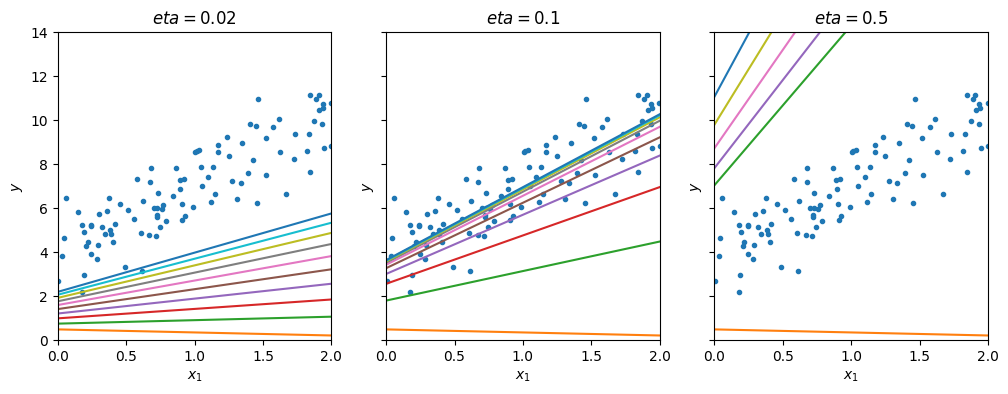

In [4]:
# plot gradient descents

# prepare for plots
thetas = [theta_0_02, theta_0_1, theta_0_5]
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

# plot
fig, axes = plt.subplots(1,3, sharey=True, figsize=(12,4))
for ax, theta, eta in zip(axes, thetas, [0.02, 0.1, 0.5]):
    ax.set_xlim((0,2))
    ax.set_ylim((0,14))
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$y$")
    ax.set_title("$eta=$" + str(eta))
    ax.plot(X, y, ".")
    for t in theta:
        y_predict = X_new_b.dot(t)
        ax.plot(X_new, y_predict)
    